<a id="1"></a>
# <p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>

In [130]:
import numpy as np
import pandas as pd
pd.set_option('display.max_column', None)

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier

<a id="1"></a>
# <p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Loading Data</p>

In [131]:
data = pd.read_csv('wine-clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<a id="1"></a>
# <p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Data Decreption</p>

In [132]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [134]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

<a id="1"></a>
# <p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EDA</p>

In [135]:
data1 = data.copy()

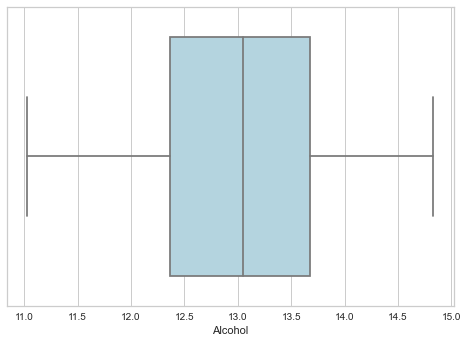

In [136]:
sns.boxplot(x = data1['Alcohol'], color= '#ADD8E6')
plt.show()

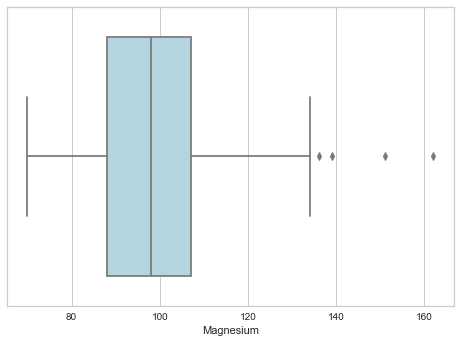

In [137]:
sns.boxplot(x = data1['Magnesium'], color= '#ADD8E6')
plt.show()

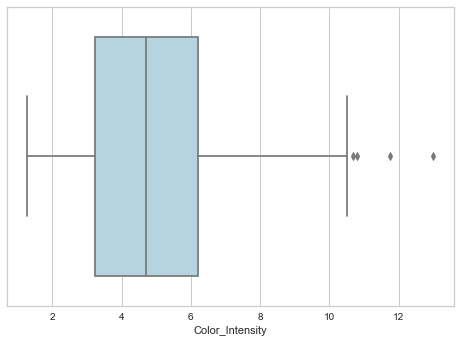

In [138]:
sns.boxplot(x = data1['Color_Intensity'], color= '#ADD8E6')
plt.show()


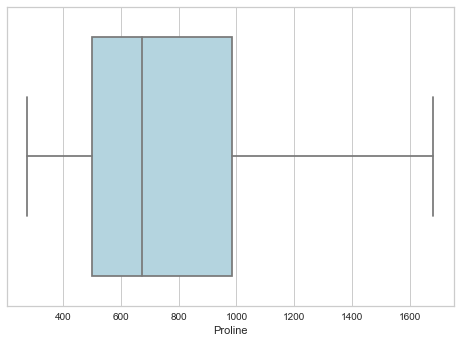

In [139]:
sns.boxplot(x = data1['Proline'], color= '#ADD8E6')
plt.show()

There are outliers in column `Color_Intensity` and `Magnesium`.

<AxesSubplot:>

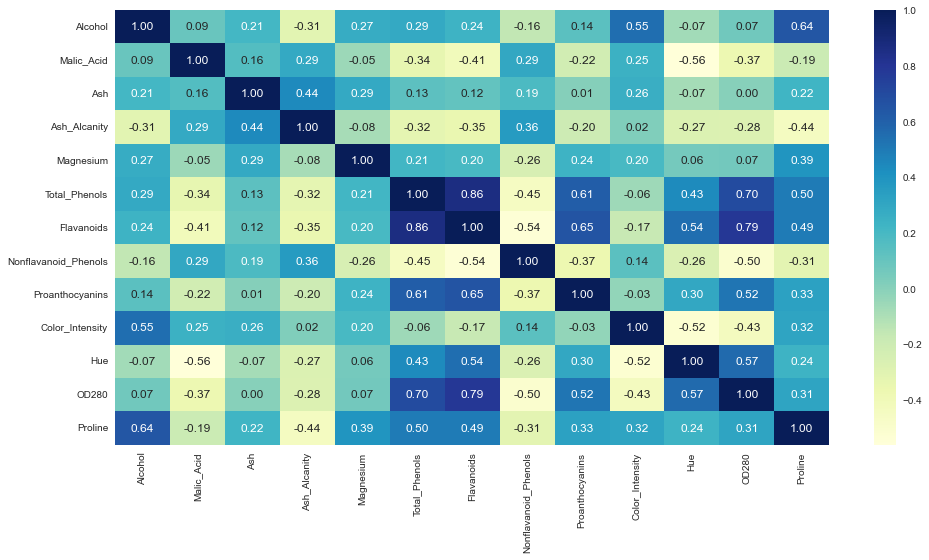

In [140]:
plt.figure(figsize= (16, 8))
sns.heatmap(data1.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

<a id="1"></a>
# <p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Data Preprocessing</p>

In [141]:
data2 = data1.copy()

In [142]:
data2 = data2[(data2['Color_Intensity']<10.5)]
data2 = data2[(data2['Magnesium']<130.5)]
data2.reset_index(drop=True,inplace=True)

In [143]:
data2

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
163,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
164,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
165,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


All features are numerical features so no need of encoding.

Now I will apply standard scaling.

In [144]:
data3 = data2.copy()

In [145]:
scaler = StandardScaler()
scaler.fit(data3)
data3 = pd.DataFrame(scaler.transform(data3),columns= data3.columns)

In [146]:
data3.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.506992,-0.575214,0.248635,-1.163247,2.420563,0.799490,0.996195,-0.673308,1.329270,0.340695,0.359625,1.824142,0.997097
1,0.243502,-0.513102,-0.825531,-2.515063,0.154771,0.559786,0.697962,-0.837938,-0.504892,-0.264838,0.404801,1.086707,0.950225
2,0.194434,0.001541,1.137600,-0.241553,0.238690,0.799490,1.175135,-0.508678,2.273591,0.359918,0.314448,0.760533,1.372075
3,1.678729,-0.362258,0.507917,-0.794569,1.245708,2.477414,1.423663,-1.002569,1.129510,1.378750,-0.453548,1.157614,2.293896
4,0.292569,0.205623,1.878404,0.495801,1.665299,0.799490,0.628374,0.232158,0.475749,-0.293672,0.359625,0.420178,-0.034092


<a id="1"></a>
# <p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Clustering</p>

Before clustering I will do PCA for this dataset.

Principal component analysis (PCA) is a technique for reducing the dimensionality of datasets, increasing interpretability but at the same time minimizing information loss.

In [147]:
data4 = data3.copy()

In [148]:
pca = PCA(n_components=3)
pca.fit(data4)
data4 = pd.DataFrame(pca.transform(data4), columns=(["col1","col2", "col3"]))
data4.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,167.0,0.000000e+00,2.206910,-4.260166,-2.084161,-0.033965,2.050198,4.505223
col2,167.0,2.127373e-17,1.641382,-3.403359,-1.142664,-0.430337,1.473333,4.047235
col3,167.0,4.254747e-17,1.217250,-4.770163,-0.788753,-0.074519,0.670909,5.475857


In [149]:
data4.head()

,col1,col2,col3
0,3.472860,-1.575206,0.046621
1,2.210172,0.271772,-1.981361
2,2.615193,-0.830226,1.140860
3,3.950169,-2.653802,-0.020514
4,1.078318,-0.976033,2.196951


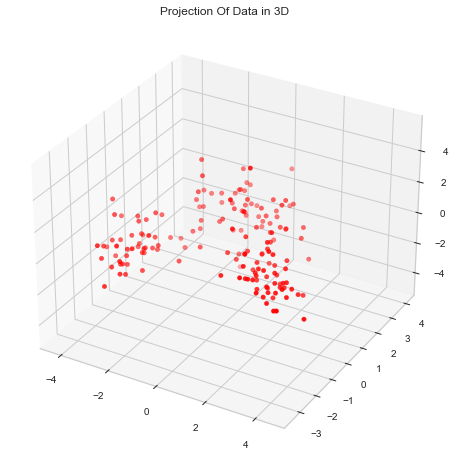

In [150]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data4["col1"],data4["col2"],data4["col3"], c="red", marker="o")
ax.set_title("Projection Of Data in 3D")
plt.show()

I will do Agglomerative Clustering.

Agglomerative clustering is a bottom-up hierarchical clustering algorithm used to group similar objects into clusters. It begins by assigning each object to its own cluster and then iteratively merges the two closest clusters until a stopping criterion is met. This process creates a dendrogram, which is a tree-like diagram that shows the hierarchy of the clusters.


The steps are:-

1)Finding right number of cluster through elbow method.

2)Fitting Agglomerative Clustering model.

3)Examining the clusters.

In [151]:
data5 = data4.copy()

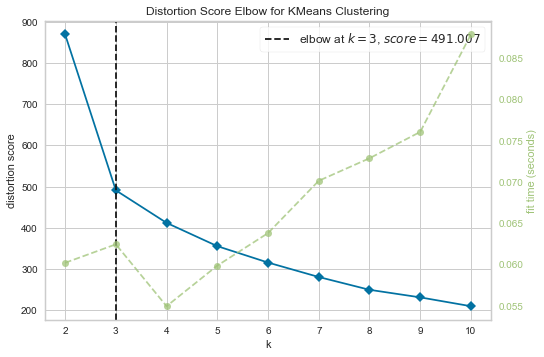

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [152]:
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(data5)
Elbow.show()

In [153]:
AC = AgglomerativeClustering(n_clusters=3)
yhat_AC = AC.fit_predict(data5)

data5["Clusters"] = yhat_AC

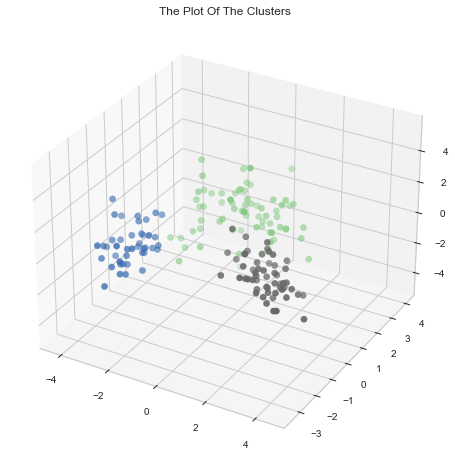

In [154]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(data5["col1"],data5["col2"],data5["col3"], s=40, c=data5["Clusters"], marker='o', cmap = "Accent")
ax.set_title("The Plot Of The Clusters")
plt.show()

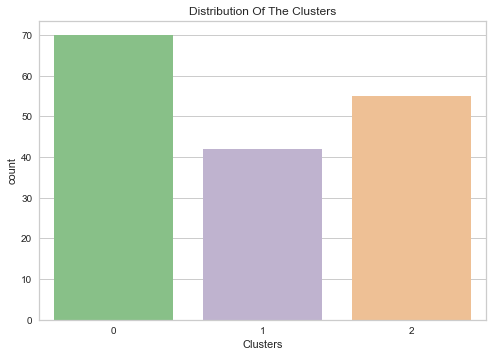

In [155]:
fig = sns.countplot(x=data5["Clusters"], palette= "Accent")
fig.set_title("Distribution Of The Clusters")
plt.show()

We can see that our dataset is divided into 3 clusters. Now we can also do Classification.

<a id="1"></a>
# <p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Classification</p>

In [156]:
data6 = data3.copy()

In [157]:
data6["Clusters"] = data5.loc[:,"Clusters"]

In [158]:
data6.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Clusters
0,1.506992,-0.575214,0.248635,-1.163247,2.420563,0.799490,0.996195,-0.673308,1.329270,0.340695,0.359625,1.824142,0.997097,2
1,0.243502,-0.513102,-0.825531,-2.515063,0.154771,0.559786,0.697962,-0.837938,-0.504892,-0.264838,0.404801,1.086707,0.950225,2
2,0.194434,0.001541,1.137600,-0.241553,0.238690,0.799490,1.175135,-0.508678,2.273591,0.359918,0.314448,0.760533,1.372075,2
3,1.678729,-0.362258,0.507917,-0.794569,1.245708,2.477414,1.423663,-1.002569,1.129510,1.378750,-0.453548,1.157614,2.293896,2
4,0.292569,0.205623,1.878404,0.495801,1.665299,0.799490,0.628374,0.232158,0.475749,-0.293672,0.359625,0.420178,-0.034092,2


In [159]:
X = data6.iloc[:, :-1].values
y = data6.iloc[:, -1].values

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [161]:
classifier = RandomForestClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [162]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[21  0  0]
 [ 0 11  0]
 [ 0  0 10]]


1.0

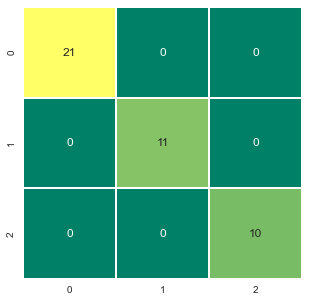

In [163]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,cbar=False,cmap='summer',linewidth=2)
plt.show()

In [164]:
final = pd.DataFrame()
final["Acctuate"] = y_test
final["Predicted"] = y_pred
final.head()

,Acctuate,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,2,2
